In [53]:
import torch
import pickle
import numpy as np
import sys
sys.path.append('../')
from utils.poincare_distance import poincare_distance
import os
import imageio
from IPython.display import display, Image
from tqdm.notebook import tqdm
import PIL.Image
import seaborn as sns
import matplotlib.pyplot as plt
import geoopt

## early action

In [2]:
embed_path = '/proj/vondrick/didac/code/DPC/logs/log_train_earlyaction_hyper_v1_poincare_kinetics_lr4/20201023_151021/embeds/model_best_epoch31_embeds.pkl'
f = open(embed_path,"rb")
feature_dict = pickle.load(f)
pred = feature_dict['pred']

dist_list = []
for i in range(pred.shape[1]):
    manif = geoopt.manifolds.PoincareBall(c=1)
    pred_step = pred[:, i, :]
    dist = manif.dist(pred_step, torch.zeros_like(pred_step))
    dist_list.append(dist)
dist_list = torch.stack(dist_list)

mean = torch.mean(dist_list, dim=1).numpy()
std = torch.std(dist_list, dim=1).numpy()

dist_list = dist_list.numpy()

In [49]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(mean)), mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Distance to origin of predicted embedding', fontsize=11)
ax.set_xticks(np.arange(len(mean)))
ax.set_xticklabels(np.arange(len(mean))+1)
ax.set_xlabel('Clips seen during prediction', fontsize=13)
ax.yaxis.grid(True)
ax.set_ylim([2.2, 2.9])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

## subaction

In [78]:
embed_path = '/proj/vondrick/didac/code/DPC/logs/log_train_dpc_hyper_v1_poincare_kinetics/20201019_195227/embeds/model_best_epoch159_embeds.pkl'
f = open(embed_path,"rb")
feature_dict = pickle.load(f)
pred = feature_dict['pred']

dist_list = []
for i in range(pred.shape[1]):
    manif = geoopt.manifolds.PoincareBall(c=1)
    pred_step = pred[:, i, :]
    dist = manif.dist(pred_step, torch.zeros_like(pred_step))
    dist_list.append(dist)
dist_list = torch.stack(dist_list)

mean = torch.mean(dist_list, dim=1).numpy()
std = torch.std(dist_list, dim=1).numpy()

dist_list = dist_list.numpy()

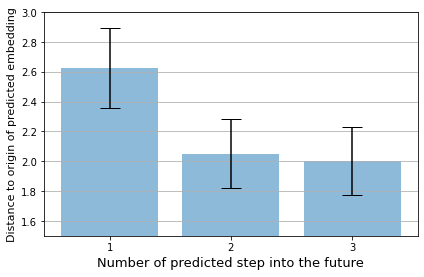

In [84]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(mean)), mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Distance to origin of predicted embedding', fontsize=11)
ax.set_xticks(np.arange(len(mean)))
ax.set_xticklabels(np.arange(len(mean))+1)
ax.set_xlabel('Number of predicted step into the future', fontsize=13)
ax.yaxis.grid(True)
ax.set_ylim([1.5, 3.0])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()